In [ ]:
# importing necessary files
import numpy as np
import pandas as pd
from google.colab import files
import io
from numpy import genfromtxt
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# data_to_load = files.upload()

In [ ]:
genome_scores = np.array(genfromtxt('/content/data2/genome-scores.csv', delimiter=',') )

In [ ]:
genome_tags = np.array(genfromtxt('/content/data2/genome-tags.csv', delimiter=',') )

In [ ]:
links = np.array(genfromtxt('/content/data2/links.csv', delimiter=',') )

In [ ]:
tags = np.array(genfromtxt('/content/data2/tags.csv', delimiter=',') )

In [ ]:
movies = np.array(genfromtxt('/content/data2/movies.csv', delimiter=',') )

In [ ]:
# Reading ratings file
ratings = pd.read_csv('/content/data2/ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading movies file
movies = pd.read_csv('/content/data2/movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [ ]:
df_movies = movies 
df_ratings = ratings

<BarContainer object of 19 artists>

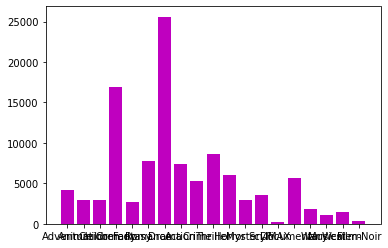

In [ ]:
generlist = df_movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')

In [ ]:
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


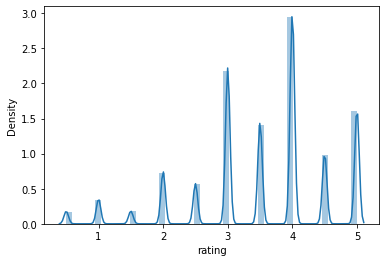

In [ ]:
sns.distplot(df_ratings["rating"]);

In [ ]:
print("Shape of frames: \n"+ " Rating DataFrame"+ str(df_ratings.shape)+"\n Movies DataFrame"+ str(df_movies.shape))

Shape of frames: 
 Rating DataFrame(25000095, 4)
 Movies DataFrame(62423, 3)


In [ ]:
merge_ratings_movies = pd.merge(df_movies, df_ratings, on='movieId', how='inner')
merge_ratings_movies.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215


In [ ]:
ratings_grouped_by_users = merge_ratings_movies.groupby('userId').agg([np.size, np.mean])
ratings_grouped_by_users.head(2)

movieId              rating           timestamp              
          size         mean   size      mean      size          mean
userId                                                              
1           70  6740.814286   70.0  3.814286        70  1.147873e+09
2          184  5098.418478  184.0  3.630435       184  1.141417e+09

In [ ]:
ratings_grouped_by_users = ratings_grouped_by_users.drop('movieId', axis = 1)

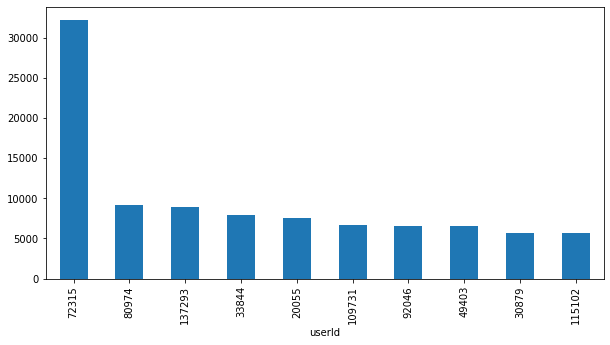

In [ ]:
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10).plot(kind='bar', figsize = (10,5))

In [ ]:
ratings_grouped_by_movies = merge_ratings_movies.groupby('movieId').agg([np.mean], np.size)
ratings_grouped_by_movies.shape


(59047, 3)

In [ ]:
ratings_grouped_by_movies.head(3)

,userId,rating,timestamp
,mean,mean,mean
movieId,,,
1,81294.564728,3.893708,1.153152e+09
2,81358.542554,3.251527,1.122310e+09
3,81343.694934,3.142028,9.806023e+08


In [ ]:
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('userId', axis=1)

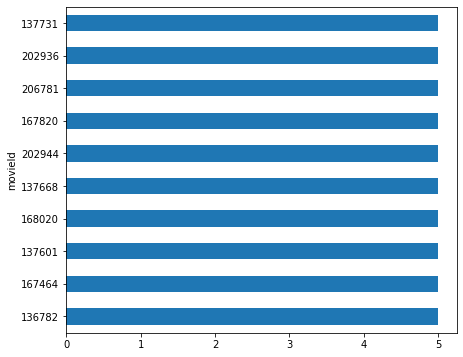

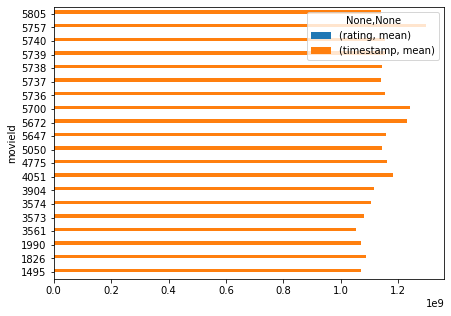

In [ ]:
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6));
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']< 1.5
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]
low_rated_movies.head(20).plot(kind='barh', figsize=(7,5));


In [ ]:
low_rated_movies.head(10)


,rating,timestamp
,mean,mean
movieId,,
1495,1.423077,1.068328e+09
1826,1.195214,1.085696e+09
1990,1.435065,1.071299e+09
3561,1.000000,1.051371e+09
3573,1.456790,1.080806e+09
3574,1.274074,1.105007e+09
3904,1.375000,1.115484e+09
4051,1.484127,1.182113e+09
